In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [151]:
df = pd.read_csv(r'D:\Yuri\Projects\approved_and_not_buyout\approved_and_not_buyout.csv')
lastta = pd.read_csv(r'D:\Yuri\Projects\approved_and_not_buyout\lastta.csv')
total = pd.read_csv(r'D:\Yuri\Projects\approved_and_not_buyout\_total_USD_.csv')
total_by_countries_expanded = pd.read_csv(r'D:\Yuri\Projects\approved_and_not_buyout\total_by_countries_expanded.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25136 entries, 0 to 25135
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_phone                25136 non-null  object 
 1   name_en                       25136 non-null  object 
 2   orders_count_buyout_is_false  25136 non-null  int64  
 3   orders_count_buyout_is_true   25136 non-null  int64  
 4   total_closed_orders           25136 non-null  int64  
 5   USD_total_closed_orders       25136 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.2+ MB


### Данные с 2022-01-01

In [105]:
df

,customer_phone,name_en,orders_count_buyout_is_false,orders_count_buyout_is_true,total_closed_orders,USD_total_closed_orders
0,(empty),Chile,3,45,48,2029.060633
1,(empty),Mexico,8,157,165,6980.846705
2,07041292485,Japan,2,1,3,212.880242
3,08060606689,Japan,2,0,2,98.539620
4,08081468141,Japan,2,0,2,158.596373
...,...,...,...,...,...,...
25131,undefined,France-Darix,81,471,552,9381.000767
25132,undefined,Italy-Darix,21,338,359,5685.657626
25133,undefined,Mexico,1010,4165,5175,150312.224663
25134,undefined,Spain-Darix,12,5,17,220.922611


In [108]:
lastta

,customer_phone,name_en,orders_count_buyout_is_false,orders_count_buyout_is_true,total_closed_orders,USD_total_closed_orders,revenue
0,(empty),Chile,3,47,50,2029.06,233.09
1,(empty),Mexico,8,159,167,7023.45,1216.92
2,00104858209,Colombia,1,0,1,35.74,19.00
3,004421107797,Mexico,1,0,1,54.26,17.00
4,005581424742,Mexico,1,0,1,76.58,24.00
...,...,...,...,...,...,...,...
408945,undefined,Italy-Darix,21,340,361,5706.36,0.00
408946,undefined,Mexico,1014,4183,5197,150917.07,0.00
408947,undefined,Spain-Darix,12,5,17,220.92,0.00
408948,undefined,The Netherlands,9,78,87,1512.75,0.00


In [85]:
total

,total_order_count,USD_total_order_count,buyouted_income,total_revenue,revenue_nets_ratio,revenue_buyout_income_ratio
0,1240142,82799044,45511122.17,19345238,0.23,0.43


In [57]:
group_by_phone_df = df.groupby('customer_phone', as_index=False).agg({'orders_count_buyout_is_false':sum, 'orders_count_buyout_is_true':sum, 'total_closed_orders': sum, 'USD_total_closed_orders': sum})

In [58]:
group_by_phone_df = group_by_phone_df.loc[1:25125]
group_by_phone_df

,customer_phone,orders_count_buyout_is_false,orders_count_buyout_is_true,total_closed_orders,USD_total_closed_orders
1,07041292485,2,1,3,212.880242
2,08060606689,2,0,2,98.539620
3,08081468141,2,0,2,158.596373
4,13175010358,2,0,2,154.485132
5,15598535956,2,0,2,193.412081
...,...,...,...,...,...
25121,94779584408,2,0,2,149.976226
25122,94779626816,2,0,2,95.955283
25123,94781615555,2,0,2,149.869322
25124,94783926421,2,0,2,83.330809


In [175]:
#message = 'Orders in query/total orders is: {order}%, USD in query/total USD is: {usd}%, USD in query/net sales is: {inc}%'
message = 'Orders query/total orders is: {order}%, USD query/total USD is: {usd}%, USD query/net sales is: {inc}%, revenue query/net sales is: {rev}%'

In [176]:
group_by_phone_df['orders_count_buyout_is_false'].sum(), group_by_phone_df['orders_count_buyout_is_true'].sum(), 

(57485, 8193)

In [178]:
lastta = lastta.loc[2:408937]
lastta

,customer_phone,name_en,orders_count_buyout_is_false,orders_count_buyout_is_true,total_closed_orders,USD_total_closed_orders,revenue
2,00104858209,Colombia,1,0,1,35.74,19.0
3,004421107797,Mexico,1,0,1,54.26,17.0
4,005581424742,Mexico,1,0,1,76.58,24.0
5,006391193794,Mexico,1,0,1,75.36,19.0
6,006611174574,Mexico,1,0,1,54.03,17.0
...,...,...,...,...,...,...,...
408933,9824471760,Peru,1,0,1,73.05,18.0
408934,987347281987347281,Peru,1,0,1,42.36,20.0
408935,9875661716,Peru,1,0,1,41.58,9.0
408936,987668535729497,Mexico,1,0,1,81.24,17.0


#### orders_count_buyout_is_false > 0

In [179]:
# % заказов, которые аппрувились, но не выкупались хотя бы 1 раз
message.format(order=round(lastta['orders_count_buyout_is_false'].sum()/total.iloc[0, 0]*100, 2), 
               usd=round(lastta['USD_total_closed_orders'].sum()/total.iloc[0, 1]*100, 2),
               inc=round(lastta['USD_total_closed_orders'].sum()/total.iloc[0, 2]*100, 2),
               rev=round(lastta['revenue'].sum()/total.iloc[0, 2]*100, 2))

'Orders query/total orders is: 35.55%, USD query/total USD is: 40.55%, USD query/net sales is: 73.77%, revenue query/net sales is: 16.67%'

In [180]:
# % заказов, которые аппрувились, но не выкупались хотя бы 1 раз, при этом других выкупов не было
message.format(order=round(lastta[lastta['orders_count_buyout_is_true'] == 0]['orders_count_buyout_is_false'].sum()/total.iloc[0, 0]*100, 2), 
               usd=round(lastta[lastta['orders_count_buyout_is_true'] == 0]['USD_total_closed_orders'].sum()/total.iloc[0, 1]*100, 2),
               inc=round(lastta[lastta['orders_count_buyout_is_true'] == 0]['USD_total_closed_orders'].sum()/total.iloc[0, 2]*100, 2),
               rev=round(lastta[lastta['orders_count_buyout_is_true'] == 0]['revenue'].sum()/total.iloc[0, 2]*100, 2))

'Orders query/total orders is: 31.65%, USD query/total USD is: 31.81%, USD query/net sales is: 57.88%, revenue query/net sales is: 13.23%'

In [181]:
# % заказов, которые аппрувились, но не выкупались хотя бы 1 раз, при этом были другие выкупы
message.format(order=round(lastta[lastta['orders_count_buyout_is_true'] != 0]['orders_count_buyout_is_false'].sum()/total.iloc[0, 0]*100, 2), 
               usd=round(lastta[lastta['orders_count_buyout_is_true'] != 0]['USD_total_closed_orders'].sum()/total.iloc[0, 1]*100, 2),
               inc=round(lastta[lastta['orders_count_buyout_is_true'] != 0]['USD_total_closed_orders'].sum()/total.iloc[0, 2]*100, 2),
               rev=round(lastta[lastta['orders_count_buyout_is_true'] != 0]['revenue'].sum()/total.iloc[0, 2]*100, 2)) 

'Orders query/total orders is: 3.89%, USD query/total USD is: 8.73%, USD query/net sales is: 15.89%, revenue query/net sales is: 3.43%'

#### orders_count_buyout_is_false > 1

In [182]:
# % заказов, которые аппрувились, но не выкупались хотя бы 2 раза
message.format(order=round(group_by_phone_df['orders_count_buyout_is_false'].sum()/total.iloc[0, 0]*100, 2), 
               usd=round(group_by_phone_df['USD_total_closed_orders'].sum()/total.iloc[0, 1]*100, 2),
               inc=round(group_by_phone_df['USD_total_closed_orders'].sum()/total.iloc[0, 2]*100, 2),
               rev=round(group_by_phone_df['revenue'].sum()/total.iloc[0, 2]*100, 2))

'Orders query/total orders is: 4.64%, USD query/total USD is: 5.98%, USD query/net sales is: 10.88%, revenue query/net sales is: 2.3%'

In [183]:
# % заказов, которые аппрувились, но не выкупались хотя бы 2 раза, при этом других выкупов не было
message.format(order=round(group_by_phone_df[group_by_phone_df['orders_count_buyout_is_true'] == 0]['orders_count_buyout_is_false'].sum()/total.iloc[0, 0]*100, 2), 
               usd=round(group_by_phone_df[group_by_phone_df['orders_count_buyout_is_true'] == 0]['USD_total_closed_orders'].sum()/total.iloc[0, 1]*100, 2),
               inc=round(group_by_phone_df[group_by_phone_df['orders_count_buyout_is_true'] == 0]['USD_total_closed_orders'].sum()/total.iloc[0, 2]*100, 2),
               rev=round(group_by_phone_df[group_by_phone_df['orders_count_buyout_is_true'] == 0]['revenue'].sum()/total.iloc[0, 2]*100, 2))

'Orders query/total orders is: 3.48%, USD query/total USD is: 3.83%, USD query/net sales is: 6.96%, revenue query/net sales is: 1.51%'

In [184]:
# % заказов, которые аппрувились, но не выкупались хотя бы 2 раза, при этом были другие выкупы
message.format(order=round(group_by_phone_df[group_by_phone_df['orders_count_buyout_is_true'] != 0]['orders_count_buyout_is_false'].sum()/total.iloc[0, 0]*100, 2), 
               usd=round(group_by_phone_df[group_by_phone_df['orders_count_buyout_is_true'] != 0]['USD_total_closed_orders'].sum()/total.iloc[0, 1]*100, 2),
               inc=round(group_by_phone_df[group_by_phone_df['orders_count_buyout_is_true'] != 0]['USD_total_closed_orders'].sum()/total.iloc[0, 2]*100, 2),
               rev=round(group_by_phone_df[group_by_phone_df['orders_count_buyout_is_true'] != 0]['revenue'].sum()/total.iloc[0, 2]*100, 2)) 

'Orders query/total orders is: 1.15%, USD query/total USD is: 2.15%, USD query/net sales is: 3.92%, revenue query/net sales is: 0.8%'

#### orders_count_buyout_is_false > 2

In [185]:
group_by_phone_df = lastta[lastta['orders_count_buyout_is_false'] > 1]
more_than_2 = group_by_phone_df[group_by_phone_df['orders_count_buyout_is_false'] > 2]

In [186]:
# % заказов, которые аппрувились, но не выкупались хотя бы 3 раза
message.format(order=round(more_than_2['orders_count_buyout_is_false'].sum()/total.iloc[0, 0]*100, 2), 
               usd=round(more_than_2['USD_total_closed_orders'].sum()/total.iloc[0, 1]*100, 2),
               inc=round(more_than_2['USD_total_closed_orders'].sum()/total.iloc[0, 2]*100, 2),
               rev=round(more_than_2['revenue'].sum()/total.iloc[0, 2]*100, 2))

'Orders query/total orders is: 1.19%, USD query/total USD is: 1.67%, USD query/net sales is: 3.03%, revenue query/net sales is: 0.62%'

In [187]:
# % заказов, которые аппрувились, но не выкупались хотя бы 3 раза, при этом других выкупов не было
message.format(order=round(more_than_2[more_than_2['orders_count_buyout_is_true'] == 0]['orders_count_buyout_is_false'].sum()/total.iloc[0, 0]*100, 2), 
               usd=round(more_than_2[more_than_2['orders_count_buyout_is_true'] == 0]['USD_total_closed_orders'].sum()/total.iloc[0, 1]*100, 2),
               inc=round(more_than_2[more_than_2['orders_count_buyout_is_true'] == 0]['USD_total_closed_orders'].sum()/total.iloc[0, 2]*100, 2),
               rev=round(more_than_2[more_than_2['orders_count_buyout_is_true'] == 0]['revenue'].sum()/total.iloc[0, 2]*100, 2))

'Orders query/total orders is: 0.78%, USD query/total USD is: 0.94%, USD query/net sales is: 1.72%, revenue query/net sales is: 0.35%'

In [188]:
# % заказов, которые аппрувились, но не выкупались хотя бы 3 раза, при этом были другие выкупы
message.format(order=round(more_than_2[more_than_2['orders_count_buyout_is_true'] != 0]['orders_count_buyout_is_false'].sum()/total.iloc[0, 0]*100, 2), 
               usd=round(more_than_2[more_than_2['orders_count_buyout_is_true'] != 0]['USD_total_closed_orders'].sum()/total.iloc[0, 1]*100, 2),
               inc=round(more_than_2[more_than_2['orders_count_buyout_is_true'] != 0]['USD_total_closed_orders'].sum()/total.iloc[0, 2]*100, 2),
               rev=round(more_than_2[more_than_2['orders_count_buyout_is_true'] != 0]['revenue'].sum()/total.iloc[0, 2]*100, 2)) 

'Orders query/total orders is: 0.41%, USD query/total USD is: 0.72%, USD query/net sales is: 1.31%, revenue query/net sales is: 0.27%'

#### orders_count_buyout_is_false > 3

In [189]:
more_than_3 = group_by_phone_df[group_by_phone_df['orders_count_buyout_is_false'] > 3]

In [190]:
# % заказов, которые аппрувились, но не выкупались хотя бы 4 раза
message.format(order=round(more_than_3['orders_count_buyout_is_false'].sum()/total.iloc[0, 0]*100, 2), 
               usd=round(more_than_3['USD_total_closed_orders'].sum()/total.iloc[0, 1]*100, 2),
               inc=round(more_than_3['USD_total_closed_orders'].sum()/total.iloc[0, 2]*100, 2),
               rev=round(more_than_3['revenue'].sum()/total.iloc[0, 2]*100, 2))


'Orders query/total orders is: 0.44%, USD query/total USD is: 0.63%, USD query/net sales is: 1.14%, revenue query/net sales is: 0.24%'

In [191]:
# % заказов, которые аппрувились, но не выкупались хотя бы 4 раза, при этом других выкупов не было
message.format(order=round(more_than_3[more_than_3['orders_count_buyout_is_true'] == 0]['orders_count_buyout_is_false'].sum()/total.iloc[0, 0]*100, 2), 
               usd=round(more_than_3[more_than_3['orders_count_buyout_is_true'] == 0]['USD_total_closed_orders'].sum()/total.iloc[0, 1]*100, 2),
               inc=round(more_than_3[more_than_3['orders_count_buyout_is_true'] == 0]['USD_total_closed_orders'].sum()/total.iloc[0, 2]*100, 2),
               rev=round(more_than_3[more_than_3['orders_count_buyout_is_true'] == 0]['revenue'].sum()/total.iloc[0, 2]*100, 2))

'Orders query/total orders is: 0.25%, USD query/total USD is: 0.29%, USD query/net sales is: 0.53%, revenue query/net sales is: 0.12%'

In [192]:
# % заказов, которые аппрувились, но не выкупались хотя бы 4 раза, при этом были другие выкупы
message.format(order=round(more_than_3[more_than_3['orders_count_buyout_is_true'] != 0]['orders_count_buyout_is_false'].sum()/total.iloc[0, 0]*100, 2), 
               usd=round(more_than_3[more_than_3['orders_count_buyout_is_true'] != 0]['USD_total_closed_orders'].sum()/total.iloc[0, 1]*100, 2),
               inc=round(more_than_3[more_than_3['orders_count_buyout_is_true'] != 0]['USD_total_closed_orders'].sum()/total.iloc[0, 2]*100, 2),
               rev=round(more_than_3[more_than_3['orders_count_buyout_is_true'] != 0]['revenue'].sum()/total.iloc[0, 2]*100, 2)) 

'Orders query/total orders is: 0.19%, USD query/total USD is: 0.34%, USD query/net sales is: 0.62%, revenue query/net sales is: 0.12%'

In [193]:
#####################################################

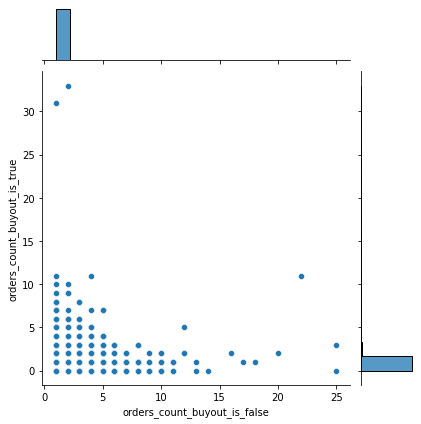

In [194]:
sns.jointplot(x=lastta.orders_count_buyout_is_false, y=lastta.orders_count_buyout_is_true)

In [195]:
group_by_phone_df[group_by_phone_df['orders_count_buyout_is_false'] > 2]

,customer_phone,name_en,orders_count_buyout_is_false,orders_count_buyout_is_true,total_closed_orders,USD_total_closed_orders,revenue
428,16126368095,Mexico,3,0,3,267.31,64.0
953,18094908862,Dominican Republic,3,0,3,209.87,24.0
2379,18293427196,Dominican Republic,3,0,3,241.09,25.0
2688,18294782366,Dominican Republic,3,0,3,200.04,25.5
3538,18298719546,Dominican Republic,3,0,3,194.36,29.5
...,...,...,...,...,...,...,...
407785,94771008387,Sri Lanka,3,0,3,128.19,30.0
407996,94772829125,Sri Lanka,3,0,3,166.56,25.0
408186,94774326015,Sri Lanka,3,0,3,147.56,30.0
408250,94774833878,Sri Lanka,3,4,7,485.85,105.0


In [196]:
group_by_phone_df['orders_count_buyout_is_false'].unique()

array([ 2,  3,  4,  5,  6,  7,  8, 10,  9, 12, 20, 16, 11, 22, 13, 14, 17,
       25, 18], dtype=int64)

In [197]:
group_by_phone_df['orders_count_buyout_is_true'].unique()

array([ 1,  0,  3,  2,  8,  4,  5, 10,  6, 33,  7,  9, 11], dtype=int64)

In [198]:
group_by_phone_df['total_closed_orders'].sum()

65678

### Разбиение по странам

In [243]:
group_by_country_df = lastta.groupby('name_en', as_index=False).agg({'orders_count_buyout_is_false':sum, 'orders_count_buyout_is_true':sum, 'total_closed_orders': sum, 'USD_total_closed_orders': sum, 'revenue': sum})

In [201]:
# Нормирую количество невыкупленных заказов на общее количество заказов в каждой стране

In [220]:
compare_df = total_by_countries_expanded.drop([1, 3, 31, 0, 35, 34, 2, 32, 36, 5])

In [204]:
compare_df['fraud_country_index'] = group_by_country_df['orders_count_buyout_is_false']/compare_df['total_order_count']

In [244]:
group_by_country_df['fraud_country_index'] = group_by_country_df['orders_count_buyout_is_false']/compare_df['total_order_count']
#group_by_country_df[['name_en', 'orders_count_buyout_is_false', 'fraud_country_index']].sort_values(by='orders_count_buyout_is_false', ascending=False)

In [246]:
#compare_df = compare_df.sort_values(by='name_en').reset_index()
#compare_df

In [229]:
group_by_country_df.drop('fraud_country_index', axis=1, inplace=True)

In [232]:
group_by_country_df['fraud_country_index'] = group_by_country_df['orders_count_buyout_is_false']/compare_df['total_order_count']

# ГДЕ orders_count_buyout_is_false > 0

In [342]:
group_by_country_df = lastta
group_by_country_df = group_by_country_df.groupby('name_en', as_index=False).agg({'orders_count_buyout_is_false':sum, 'orders_count_buyout_is_true':sum, 'total_closed_orders': sum, 'USD_total_closed_orders': sum, 'revenue': sum})
compare_df = total_by_countries_expanded.drop([1, 3, 31, 0, 35, 34, 2, 32, 36, 5]).sort_values(by='name_en').reset_index().drop('index', axis=1)
group_by_country_df['fraud_country_index'] = group_by_country_df['orders_count_buyout_is_false']/compare_df['total_order_count']
group_by_country_df = group_by_country_df.sort_values(by='name_en').reset_index().drop('index', axis=1)

In [353]:
group_by_country_df

,name_en,orders_count_buyout_is_false,orders_count_buyout_is_true,total_closed_orders,USD_total_closed_orders,revenue,fraud_country_index
0,Argentina,6075,213,6288,362509.46,71270.0,0.527664
1,Bolivia,25635,4692,30327,1939164.36,286800.5,0.301911
2,Cambodia,3110,225,3335,203726.49,46649.0,0.526851
3,Chile,23118,2903,26021,1902672.47,588530.0,0.274554
4,Colombia,30288,3345,33633,1526648.35,661718.5,0.246174
5,Costa Rica,24173,3771,27944,1957474.24,302381.5,0.344974
6,Croatia-Darix,1,0,1,29.22,0.0,1.000000
7,Dominican Republic,3920,131,4051,278477.94,38381.0,0.460526
8,Ecuador,1671,63,1734,91346.70,16700.0,0.279385
9,France-Darix,1,0,1,15.07,0.0,0.001764


In [406]:
compare_df

,name_en,total_order_count,USD_total_order_count,buyouted_orders,buyouted_nets,revenue,revenue_nets_ratio,revenue_buyout_nets_ratio
0,Argentina,11513,689258,4541,266338.17,127022.00,0.18,0.48
1,Bolivia,84909,5174075,38456,2436536.65,751145.50,0.15,0.31
2,Cambodia,5903,372504,2675,177719.32,83467.00,0.22,0.47
3,Chile,84202,6004437,54758,3959470.47,1828471.08,0.30,0.46
4,Colombia,123035,5597662,73921,3369567.09,2319415.38,0.41,0.69
5,Costa Rica,70072,4452982,41803,2551460.96,766098.50,0.17,0.30
6,Croatia-Darix,1,29,0,NaN,0.00,0.00,NaN
7,Dominican Republic,8512,571228,3488,231239.15,79879.50,0.14,0.35
8,Ecuador,5981,317838,2444,133259.50,56417.00,0.18,0.42
9,France-Darix,567,9447,474,9412.20,0.00,0.00,0.00


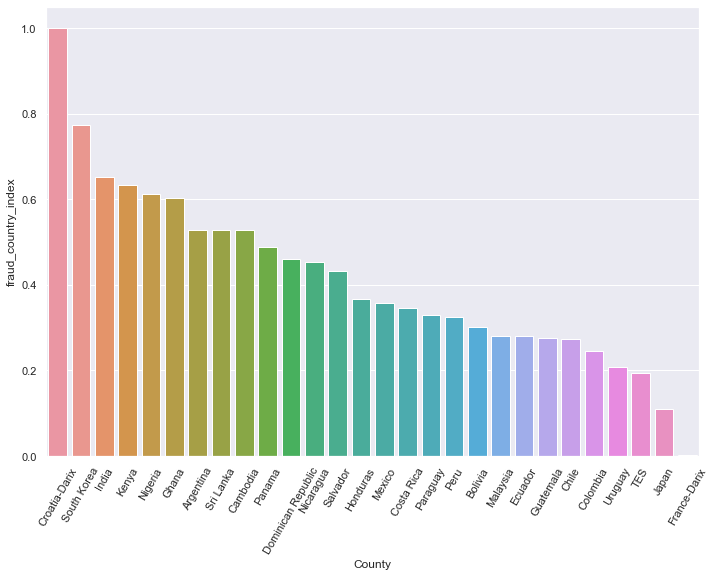

In [354]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
group_by_country_df = group_by_country_df.sort_values('fraud_country_index', ascending=False)
sns.barplot(x='name_en', y='fraud_country_index', data=group_by_country_df)
plt.xlabel('County')
plt.ylabel('fraud_country_index')
plt.xticks(rotation=60);

# ГДЕ orders_count_buyout_is_false > 1

In [415]:
group_by_country_df_2 = lastta[lastta['orders_count_buyout_is_false'] > 1]
group_by_country_df_2 = group_by_country_df_2.groupby('name_en', as_index=False).agg({'orders_count_buyout_is_false':sum, 'orders_count_buyout_is_true':sum, 'total_closed_orders': sum, 'USD_total_closed_orders': sum, 'revenue': sum})
compare_df_2 = compare_df
compare_df_2 = compare_df_2.drop([6, 9, 13]).reset_index().drop('index', axis=1)
group_by_country_df_2['fraud_country_index'] = group_by_country_df_2['orders_count_buyout_is_false']/compare_df_2['total_order_count']
group_by_country_df_2 = group_by_country_df_2.sort_values(by='name_en')

In [363]:
group_by_country_df_2

,name_en,orders_count_buyout_is_false,orders_count_buyout_is_true,total_closed_orders,USD_total_closed_orders,revenue,fraud_country_index
0,Argentina,516,29,545,33924.62,6099.5,0.044819
1,Bolivia,4143,957,5100,354485.49,49748.5,0.048793
2,Cambodia,392,46,438,27758.01,5940.0,0.066407
3,Chile,3160,467,3627,280982.88,82550.0,0.037529
4,Colombia,3019,423,3442,166118.66,69596.5,0.024538
5,Costa Rica,3243,543,3786,387990.59,39821.0,0.046281
6,Dominican Republic,154,6,160,11263.52,1495.0,0.018092
7,Ecuador,64,4,68,4234.00,640.0,0.010701
8,Ghana,2910,379,3289,236923.20,32625.0,0.077519
9,Guatemala,738,67,805,40952.96,9969.0,0.020487


In [405]:
compare_df_2

,name_en,total_order_count,USD_total_order_count,buyouted_orders,buyouted_nets,revenue,revenue_nets_ratio,revenue_buyout_nets_ratio
0,Argentina,11513,689258,4541,266338.17,127022.00,0.18,0.48
1,Bolivia,84909,5174075,38456,2436536.65,751145.50,0.15,0.31
2,Cambodia,5903,372504,2675,177719.32,83467.00,0.22,0.47
3,Chile,84202,6004437,54758,3959470.47,1828471.08,0.30,0.46
4,Colombia,123035,5597662,73921,3369567.09,2319415.38,0.41,0.69
5,Costa Rica,70072,4452982,41803,2551460.96,766098.50,0.17,0.30
6,Dominican Republic,8512,571228,3488,231239.15,79879.50,0.14,0.35
7,Ecuador,5981,317838,2444,133259.50,56417.00,0.18,0.42
8,Ghana,37539,2646774,10174,761011.22,368403.00,0.14,0.48
9,Guatemala,36023,1865155,24130,1259805.72,468695.00,0.25,0.37


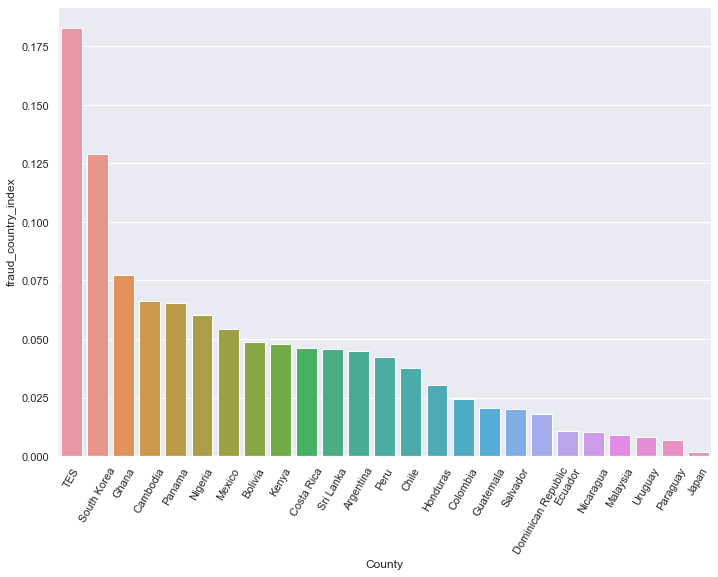

In [364]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
group_by_country_df_2 = group_by_country_df_2.sort_values('fraud_country_index', ascending=False)
sns.barplot(x='name_en', y='fraud_country_index', data=group_by_country_df_2)
plt.xlabel('County')
plt.ylabel('fraud_country_index')
plt.xticks(rotation=60);

# ГДЕ orders_count_buyout_is_false > 2

In [400]:
group_by_country_df_3 = lastta[lastta['orders_count_buyout_is_false'] > 2]
group_by_country_df_3 = group_by_country_df_3.groupby('name_en', as_index=False).agg({'orders_count_buyout_is_false':sum, 'orders_count_buyout_is_true':sum, 'total_closed_orders': sum, 'USD_total_closed_orders': sum, 'revenue': sum})
compare_df_3 = compare_df_2
compare_df_3 = compare_df_3.drop([11, 13, 15, 18, 21, 24]).reset_index().drop(['index'], axis=1)
group_by_country_df_3 = group_by_country_df_3.sort_values(by='name_en')
group_by_country_df_3['fraud_country_index'] = group_by_country_df_3['orders_count_buyout_is_false']/compare_df_3['total_order_count']


In [388]:
group_by_country_df_3

,name_en,orders_count_buyout_is_false,orders_count_buyout_is_true,total_closed_orders,USD_total_closed_orders,revenue,fraud_country_index
0,Argentina,86,3,89,5384.42,974.5,0.007470
1,Bolivia,1001,229,1230,88773.61,12246.0,0.011789
2,Cambodia,90,7,97,7008.07,1364.0,0.015246
3,Chile,992,167,1159,89182.23,26548.0,0.011781
4,Colombia,669,107,776,39394.17,16083.0,0.005437
5,Costa Rica,697,114,811,111504.25,8421.0,0.009947
6,Dominican Republic,12,0,12,845.36,104.0,0.001410
7,Ecuador,6,0,6,453.00,43.0,0.001003
8,Ghana,590,84,674,52928.66,6605.0,0.015717
9,Guatemala,184,13,197,9884.52,2411.0,0.005108


In [401]:
compare_df_3

,name_en,total_order_count,USD_total_order_count,buyouted_orders,buyouted_nets,revenue,revenue_nets_ratio,revenue_buyout_nets_ratio
0,Argentina,11513,689258,4541,266338.17,127022.00,0.18,0.48
1,Bolivia,84909,5174075,38456,2436536.65,751145.50,0.15,0.31
2,Cambodia,5903,372504,2675,177719.32,83467.00,0.22,0.47
3,Chile,84202,6004437,54758,3959470.47,1828471.08,0.30,0.46
4,Colombia,123035,5597662,73921,3369567.09,2319415.38,0.41,0.69
5,Costa Rica,70072,4452982,41803,2551460.96,766098.50,0.17,0.30
6,Dominican Republic,8512,571228,3488,231239.15,79879.50,0.14,0.35
7,Ecuador,5981,317838,2444,133259.50,56417.00,0.18,0.42
8,Ghana,37539,2646774,10174,761011.22,368403.00,0.14,0.48
9,Guatemala,36023,1865155,24130,1259805.72,468695.00,0.25,0.37


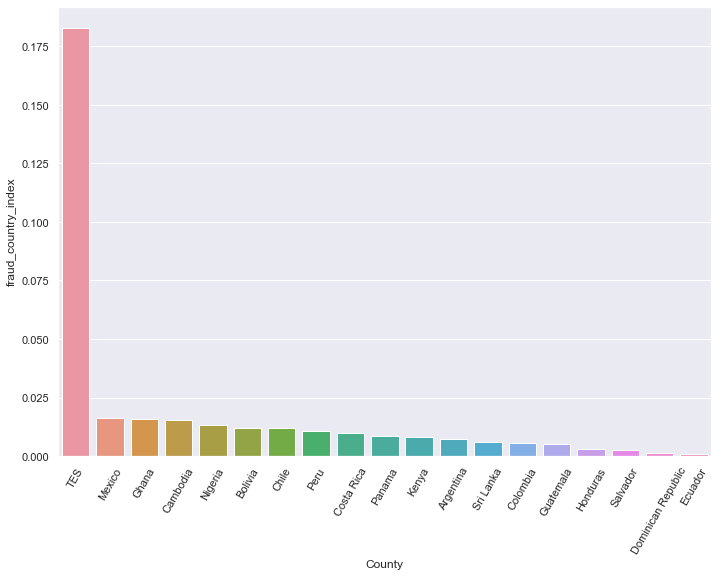

In [402]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
group_by_country_df_3 = group_by_country_df_3.sort_values('fraud_country_index', ascending=False)
sns.barplot(x='name_en', y='fraud_country_index', data=group_by_country_df_3)
plt.xlabel('County')
plt.ylabel('fraud_country_index')
plt.xticks(rotation=60);

# ГДЕ orders_count_buyout_is_false > 3

In [411]:
group_by_country_df_4 = lastta[lastta['orders_count_buyout_is_false'] > 3]
group_by_country_df_4 = group_by_country_df_4.groupby('name_en', as_index=False).agg({'orders_count_buyout_is_false':sum, 'orders_count_buyout_is_true':sum, 'total_closed_orders': sum, 'USD_total_closed_orders': sum, 'revenue': sum})
compare_df_4 = compare_df_3
compare_df_4 = compare_df_4.drop([6, 7]).reset_index().drop(['index'], axis=1)
group_by_country_df_4['fraud_country_index'] = group_by_country_df_4['orders_count_buyout_is_false']/compare_df_4['total_order_count']
group_by_country_df_4 = group_by_country_df_4.sort_values(by='name_en')

In [412]:
group_by_country_df_4

,name_en,orders_count_buyout_is_false,orders_count_buyout_is_true,total_closed_orders,USD_total_closed_orders,revenue,fraud_country_index
0,Argentina,17,2,19,1670.05,220.0,0.001477
1,Bolivia,314,76,390,30036.09,3940.5,0.003698
2,Cambodia,36,1,37,2702.19,547.0,0.006099
3,Chile,425,70,495,36498.27,11276.0,0.005047
4,Colombia,219,37,256,13552.20,5515.0,0.001780
5,Costa Rica,157,20,177,10437.63,1824.0,0.002241
6,Ghana,152,20,172,13025.16,1685.0,0.004049
7,Guatemala,52,3,55,3085.75,688.0,0.001444
8,Honduras,4,0,4,262.10,33.0,0.000120
9,Kenya,22,1,23,1259.49,216.0,0.002297


In [413]:
compare_df_4

,name_en,total_order_count,USD_total_order_count,buyouted_orders,buyouted_nets,revenue,revenue_nets_ratio,revenue_buyout_nets_ratio
0,Argentina,11513,689258,4541,266338.17,127022.00,0.18,0.48
1,Bolivia,84909,5174075,38456,2436536.65,751145.50,0.15,0.31
2,Cambodia,5903,372504,2675,177719.32,83467.00,0.22,0.47
3,Chile,84202,6004437,54758,3959470.47,1828471.08,0.30,0.46
4,Colombia,123035,5597662,73921,3369567.09,2319415.38,0.41,0.69
5,Costa Rica,70072,4452982,41803,2551460.96,766098.50,0.17,0.30
6,Ghana,37539,2646774,10174,761011.22,368403.00,0.14,0.48
7,Guatemala,36023,1865155,24130,1259805.72,468695.00,0.25,0.37
8,Honduras,33329,1884012,15499,864224.38,279665.00,0.15,0.32
9,Kenya,9576,599254,3179,199802.98,89919.00,0.15,0.45


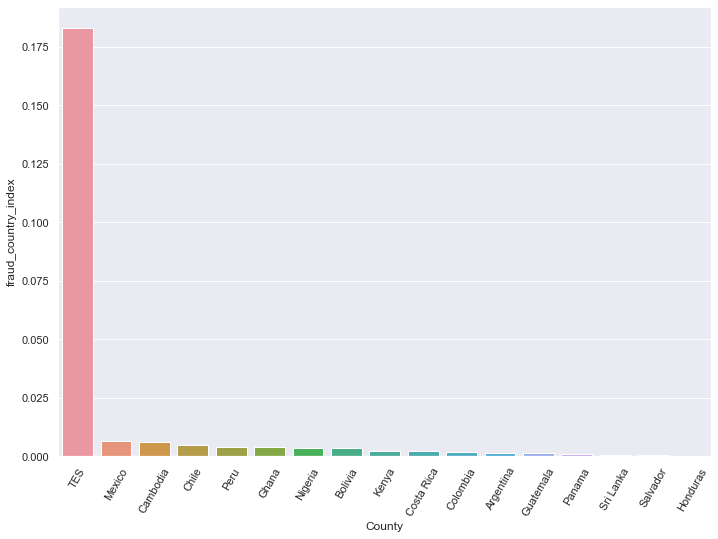

In [404]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
group_by_country_df_4 = group_by_country_df_4.sort_values('fraud_country_index', ascending=False)
sns.barplot(x='name_en', y='fraud_country_index', data=group_by_country_df_4)
plt.xlabel('County')
plt.ylabel('fraud_country_index')
plt.xticks(rotation=60);


In [416]:
group_by_country_df_2

,name_en,orders_count_buyout_is_false,orders_count_buyout_is_true,total_closed_orders,USD_total_closed_orders,revenue,fraud_country_index
0,Argentina,516,29,545,33924.62,6099.5,0.044819
1,Bolivia,4143,957,5100,354485.49,49748.5,0.048793
2,Cambodia,392,46,438,27758.01,5940.0,0.066407
3,Chile,3160,467,3627,280982.88,82550.0,0.037529
4,Colombia,3019,423,3442,166118.66,69596.5,0.024538
5,Costa Rica,3243,543,3786,387990.59,39821.0,0.046281
6,Dominican Republic,154,6,160,11263.52,1495.0,0.018092
7,Ecuador,64,4,68,4234.00,640.0,0.010701
8,Ghana,2910,379,3289,236923.20,32625.0,0.077519
9,Guatemala,738,67,805,40952.96,9969.0,0.020487


In [399]:
compare_df_2

,name_en,total_order_count,USD_total_order_count,buyouted_orders,buyouted_nets,revenue,revenue_nets_ratio,revenue_buyout_nets_ratio
0,Argentina,11513,689258,4541,266338.17,127022.00,0.18,0.48
1,Bolivia,84909,5174075,38456,2436536.65,751145.50,0.15,0.31
2,Cambodia,5903,372504,2675,177719.32,83467.00,0.22,0.47
3,Chile,84202,6004437,54758,3959470.47,1828471.08,0.30,0.46
4,Colombia,123035,5597662,73921,3369567.09,2319415.38,0.41,0.69
5,Costa Rica,70072,4452982,41803,2551460.96,766098.50,0.17,0.30
6,Dominican Republic,8512,571228,3488,231239.15,79879.50,0.14,0.35
7,Ecuador,5981,317838,2444,133259.50,56417.00,0.18,0.42
8,Ghana,37539,2646774,10174,761011.22,368403.00,0.14,0.48
9,Guatemala,36023,1865155,24130,1259805.72,468695.00,0.25,0.37


In [440]:
res1 = compare_df[['name_en', 'total_order_count']]
res1['orders_count_buyout_is_false'] = group_by_country_df['orders_count_buyout_is_false']
res1['fraud_country_index'] = group_by_country_df['fraud_country_index']

res2 = compare_df_2[['name_en', 'total_order_count']]
res2['orders_count_buyout_is_false'] = group_by_country_df_2['orders_count_buyout_is_false']
res2['fraud_country_index'] = group_by_country_df_2['fraud_country_index']

res3 = compare_df_3[['name_en', 'total_order_count']]
res3['orders_count_buyout_is_false'] = group_by_country_df_3['orders_count_buyout_is_false']
res3['fraud_country_index'] = group_by_country_df_3['fraud_country_index']

res4 = compare_df_4[['name_en', 'total_order_count']]
res4['orders_count_buyout_is_false'] = group_by_country_df_4['orders_count_buyout_is_false']
res4['fraud_country_index'] = group_by_country_df_4['fraud_country_index']

C:\Users\raznitsyn.y\AppData\Local\Temp\ipykernel_9420\1730160103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res1['orders_count_buyout_is_false'] = group_by_country_df['orders_count_buyout_is_false']
C:\Users\raznitsyn.y\AppData\Local\Temp\ipykernel_9420\1730160103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res1['fraud_country_index'] = group_by_country_df['fraud_country_index']
C:\Users\raznitsyn.y\AppData\Local\Temp\ipykernel_9420\1730160103.py:6: SettingWithCopyWarning: 
A value is tryi

In [442]:
res1.to_excel('res1.xlsx')
res2.to_excel('res2.xlsx')
res3.to_excel('res3.xlsx')
res4.to_excel('res4.xlsx')